In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Importing Classifcation Algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [32]:
df = pd.read_csv(r'Heart_Disease_Prediction.csv')

df.head(10)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [33]:
df.shape

(270, 15)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [35]:
# getting a statistical summary of the dataset

df.describe()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,134.500000,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,78.086491,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,67.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,134.500000,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,201.750000,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,269.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [36]:
# checking for null values

df.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [37]:
# viewing columns
df.columns

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [38]:
for element in df.columns:
    if isinstance(element, str) and " " in element:  # Check if element is a string
        new_element = element.replace(" ", "_")
        df.rename(columns={element:new_element}, inplace=True)

df.columns

Index(['index', 'Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol',
       'FBS_over_120', 'EKG_results', 'Max_HR', 'Exercise_angina',
       'ST_depression', 'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium',
       'Heart_Disease'],
      dtype='object')

In [39]:
df['Heart_Disease'] = df['Heart_Disease'].replace({'Presence': 1, 'Absence': 0})

In [40]:

class PreprocessData:
    def __init__(self, dataset):
        self.data = dataset

    def get_target(self, targetColumn):
        X = self.data.drop(targetColumn, axis=1)
        y = self.data[targetColumn]

        return {
            'x': X,
            'y': y
        }

    def standardize_features(self):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(self.get_target('Heart_Disease')['x'])

        return X_scaled

    def split_data(self):
        X_train, X_test, y_train, y_test = train_test_split(self.standardize_features(), self.get_target('Heart_Disease')['y'], test_size=0.2, random_state=42)

        return {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

    def get_X_train(self):
        return self.split_data()['X_train']

    def get_X_test(self):
        return self.split_data()['X_test']

    def get_y_train(self):
        return self.split_data()['y_train']

    def get_y_test(self):
        return self.split_data()['y_test']
    

In [41]:
# Getting features and target

processed_data = PreprocessData(df)
processed_data.get_target('Heart_Disease')

# Getting split data
X_train =  processed_data.get_X_train()
X_test =  processed_data.get_X_test()
y_train =  processed_data.get_y_train()
y_test =  processed_data.get_y_test()


In [42]:
models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
}

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'DecisionTree': {'max_depth': [3, 5, 7, 9]},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 9]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
}

results = []


# Function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_prediction = model.predict(x_train)
    y_test_prediction = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_prediction)
    test_accuracy = accuracy_score(y_test, y_test_prediction)
    train_f1 = f1_score(y_train, y_train_prediction)
    test_f1 = f1_score(y_test, y_test_prediction)

    print(f'\nTrain Accuracy: {train_accuracy:.4f}\n')
    print(f'Test Accuracy: {test_accuracy:.4f}\n')
    print(f'Train F1 Score: {train_f1:.4f}\n')
    print(f'Test F1 Score: {test_f1:.4f}\n')

    print('\n\nClassification Report (Test Data):\n')
    print(classification_report(y_test, y_test_prediction))

    print('Confusion Matrix (Test Data):')
    sns.heatmap(confusion_matrix(y_test, y_test_prediction), annot=True, fmt='d', cmap='Blues')
    plt.show()

    return train_accuracy, test_accuracy, train_f1, test_f1
        


Model: KNN
Best Parameters: {'n_neighbors': 9}

Train Accuracy: 0.8519

Test Accuracy: 0.8148

Train F1 Score: 0.8351

Test F1 Score: 0.7500



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54

Confusion Matrix (Test Data):


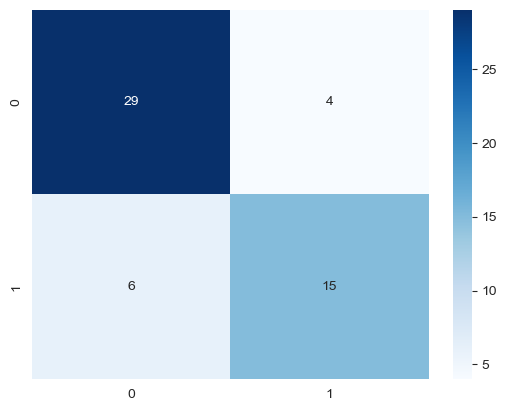


Model: DecisionTree
Best Parameters: {'max_depth': 9}

Train Accuracy: 0.9907

Test Accuracy: 0.7963

Train F1 Score: 0.9898

Test F1 Score: 0.7556



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.71      0.81      0.76        21

    accuracy                           0.80        54
   macro avg       0.79      0.80      0.79        54
weighted avg       0.81      0.80      0.80        54

Confusion Matrix (Test Data):


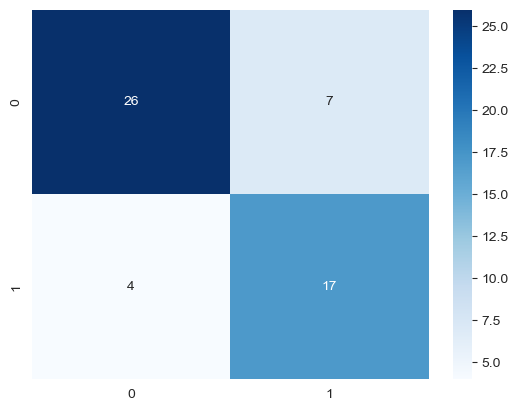


Model: LogisticRegression
Best Parameters: {'C': 1}

Train Accuracy: 0.8287

Test Accuracy: 0.9074

Train F1 Score: 0.8083

Test F1 Score: 0.8780



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

Confusion Matrix (Test Data):


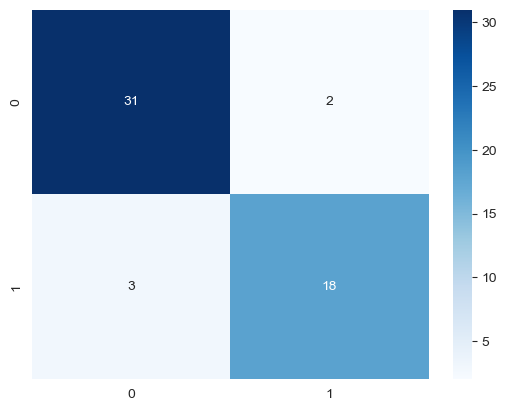


Model: RandomForest
Best Parameters: {'max_depth': 5, 'n_estimators': 200}

Train Accuracy: 0.9537

Test Accuracy: 0.8704

Train F1 Score: 0.9479

Test F1 Score: 0.8205



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.88      0.85      0.86        54
weighted avg       0.87      0.87      0.87        54

Confusion Matrix (Test Data):


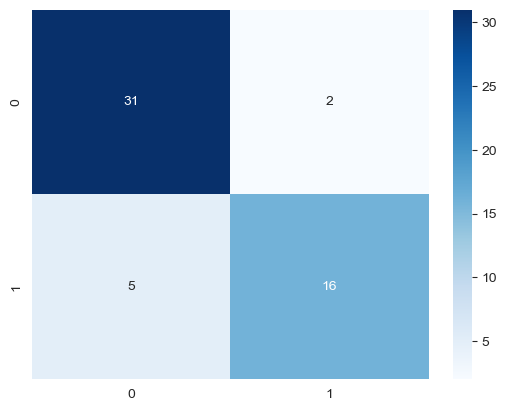


Model: XGBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}

Train Accuracy: 0.9815

Test Accuracy: 0.8148

Train F1 Score: 0.9798

Test F1 Score: 0.7368



Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54

Confusion Matrix (Test Data):


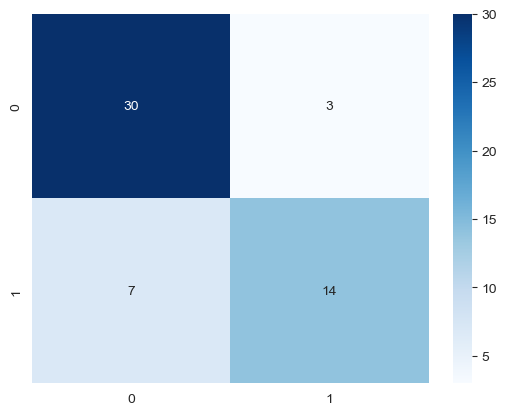

In [43]:
# Using Grid search to find the best hyperparameter for each model
for model_name, model in models.items():
    print(f'\nModel: {model_name}')
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f'Best Parameters: {grid_search.best_params_}')

    train_acc, test_acc, train_f1, test_f1 = evaluate_model(best_model, X_train, X_test, y_train, y_test)

    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    })

                Model                                   Best Params  \
0                 KNN                            {'n_neighbors': 9}   
1        DecisionTree                              {'max_depth': 9}   
2  LogisticRegression                                      {'C': 1}   
3        RandomForest         {'max_depth': 5, 'n_estimators': 200}   
4             XGBoost  {'learning_rate': 0.01, 'n_estimators': 200}   

   Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  
0        0.851852       0.814815        0.835052       0.750000  
1        0.990741       0.796296        0.989796       0.755556  
2        0.828704       0.907407        0.808290       0.878049  
3        0.953704       0.870370        0.947917       0.820513  
4        0.981481       0.814815        0.979798       0.736842  


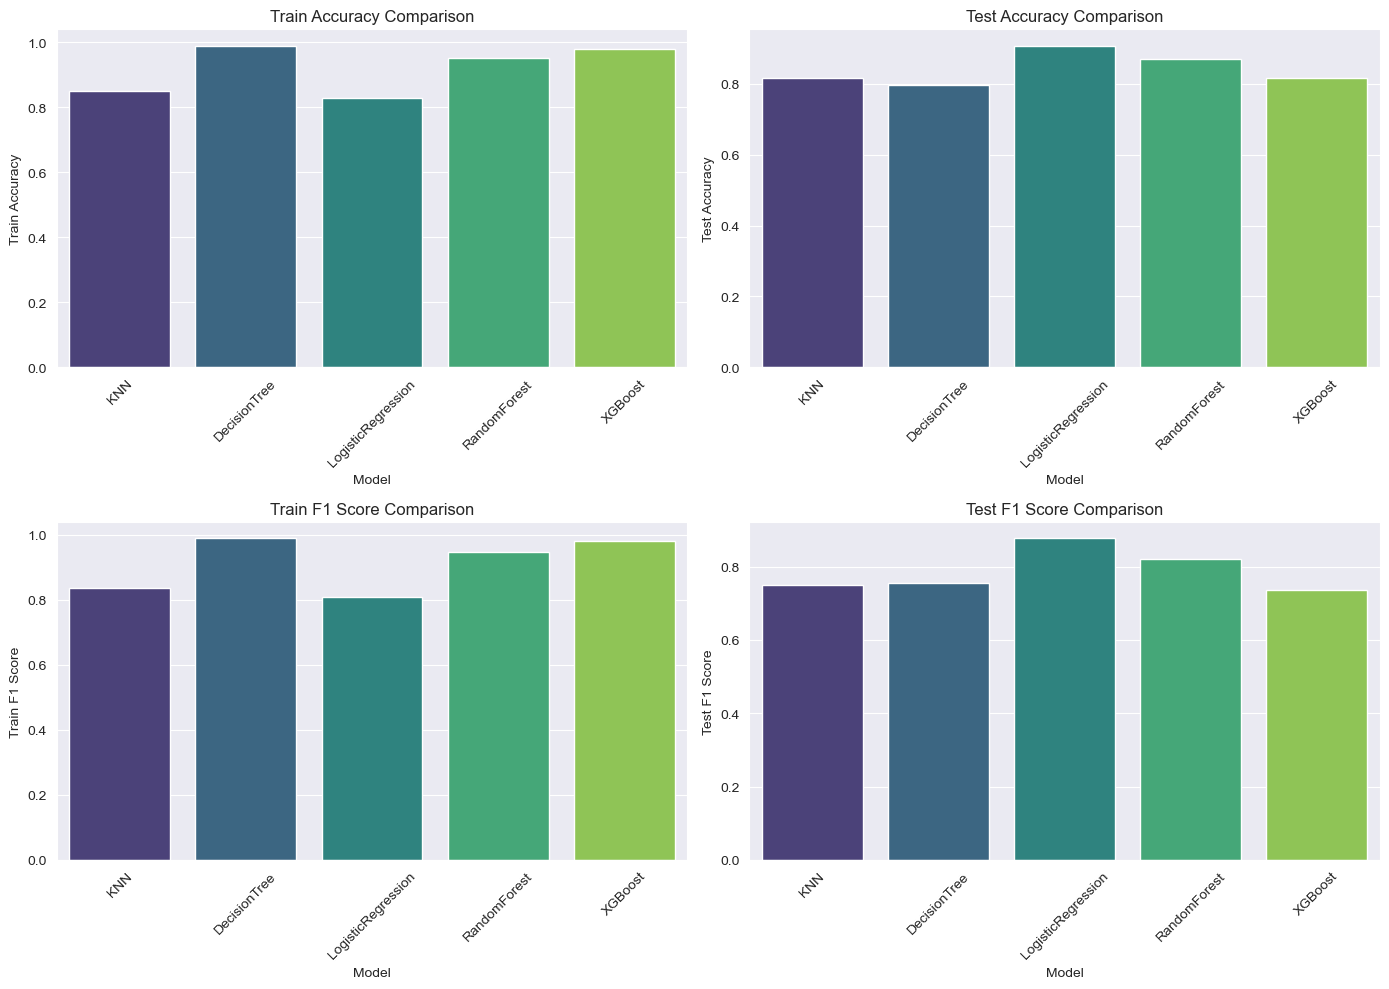

In [44]:
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score']

for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

plt.tight_layout()
plt.show()